<a href="https://colab.research.google.com/github/PreethiEdara/Text_prediction/blob/main/text_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [35]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.txt to dataset1.txt


In [37]:
file = open("dataset1.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections. The bedding was hardly able to cover it and seemed ready to slide off any moment. His many legs, pitifully thin compared with the size of the rest of him, waved about helplessly as he looked. "What\'s happened to me?" he tho'

In [38]:
len(data)


39241

Apply tokenization and some other changes

In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]


[51, 164, 52, 14, 165, 661, 32, 662, 437, 3, 251, 26, 663, 10, 5]

In [40]:
len(sequence_data)


7333

In [41]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

1399


In [42]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  7330


array([[ 51, 164,  52,  14],
       [164,  52,  14, 165],
       [ 52,  14, 165, 661],
       [ 14, 165, 661,  32],
       [165, 661,  32, 662],
       [661,  32, 662, 437],
       [ 32, 662, 437,   3],
       [662, 437,   3, 251],
       [437,   3, 251,  26],
       [  3, 251,  26, 663]])

In [43]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)


In [44]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 51 164  52]
 [164  52  14]
 [ 52  14 165]
 [ 14 165 661]
 [165 661  32]
 [661  32 662]
 [ 32 662 437]
 [662 437   3]
 [437   3 251]
 [  3 251  26]]
Response:  [ 14 165 661  32 662 437   3 251  26 663]


In [45]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

creating the model

In [46]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [47]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 10)             13990     
                                                                 
 lstm_4 (LSTM)               (None, 3, 1000)           4044000   
                                                                 
 lstm_5 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_5 (Dense)             (None, 1399)              1400399   
                                                                 
Total params: 14,463,389
Trainable params: 14,463,389
Non-trainable params: 0
_________________________________________________________________


Plot the model

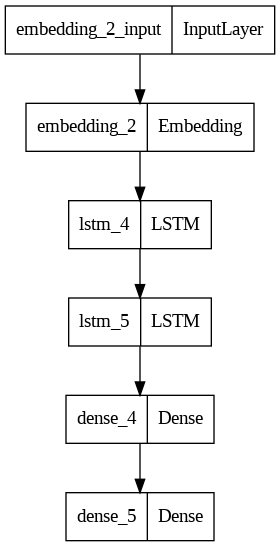

In [48]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

Train the model

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=70, batch_size=64, callbacks=[checkpoint])

Epoch 1/70
115/115 [==============================] - ETA: 0s - loss: 6.3047
Epoch 1: loss improved from inf to 6.30473, saving model to next_words.h5
115/115 [==============================] - 83s 679ms/step - loss: 6.3047
Epoch 2/70
115/115 [==============================] - ETA: 0s - loss: 5.9652
Epoch 2: loss improved from 6.30473 to 5.96524, saving model to next_words.h5
115/115 [==============================] - 79s 686ms/step - loss: 5.9652
Epoch 3/70
115/115 [==============================] - ETA: 0s - loss: 5.8918
Epoch 3: loss improved from 5.96524 to 5.89177, saving model to next_words.h5
115/115 [==============================] - 75s 655ms/step - loss: 5.8918
Epoch 4/70
115/115 [==============================] - ETA: 0s - loss: 5.7222
Epoch 4: loss improved from 5.89177 to 5.72225, saving model to next_words.h5
115/115 [==============================] - 75s 656ms/step - loss: 5.7222
Epoch 5/70
115/115 [==============================] - ETA: 0s - loss: 5.4710
Epoch 5: loss i

Predict the model

In [50]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [51]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: at the dull
['at', 'the', 'dull']
1/1 [==============================] - 1s 967ms/step
weather
Enter your line: And why was she
['why', 'was', 'she']
1/1 [==============================] - 0s 52ms/step
crying
Enter your line: leave him now in
['him', 'now', 'in']
1/1 [==============================] - 0s 41ms/step
peace
Enter your line: 0
Execution completed.....
